# Customer Segmentation using K-Means Clustering


> Customer Data is taken from a Shopping Mall. which contains :     

1.   Customer Age
2.   Customer Annual Salary
3.   Spending score (1-100, 100 meaning the person is an avid shopper)

> A K-Means Clustering algorithm is built around the dataset such that the customers are Seperated/Clustered into different catagories.

[ This dataset was used as it is simple & easy to understand for the viewers, please feel free to use datasets with more number of features ]












## Importing the libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

## Importing the dataset

In [28]:
url = 'https://raw.githubusercontent.com/rajathkotyal/Customer_Market_Clustering_Kmeans/master/Mall_Customers.csv'
dataset = pd.read_csv(url)
X = dataset.iloc[: , 2:].values 
y = dataset.iloc[:, 0]

##Analysing Corellation between the features

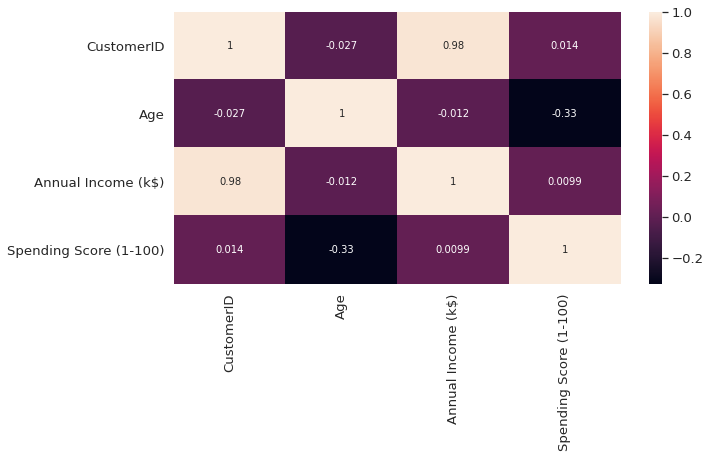

In [35]:
correl = dataset.corr()
f, ax = plt.subplots(figsize = (10,5))
sns.set(font_scale=1.2)
sns.heatmap(correl ,annot = True, annot_kws={'size':10})

[Click here](https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f) to learn about correlation heatmaps.

## Using the elbow method to find the optimal number of clusters

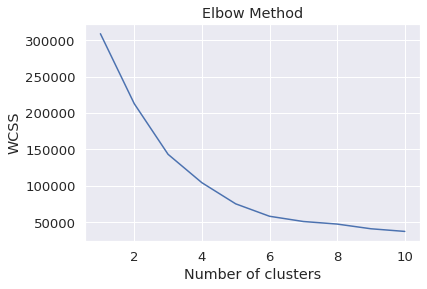

In [30]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11) :
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 69)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# WCSS = Within Cluster Sum of Squares

Since the graph does not have a drastic downfall from around **point 5** , we will choose 5 clusters.

To read more about the Elbow method :
[Click here](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/)

## Training the K-Means model on the dataset

In [31]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 69)
y_kmeans = kmeans.fit_predict(X)

##Creating & Exporting dataset with Clusters assigned

In [32]:
df = []
df = (np.c_[y, y_kmeans, X])
os.getcwd() # current working directory 

'/content'

##Exporting Dataset to csv
The created file should be present in the sidebar to the left (Refresh if not present)




In [33]:
np.savetxt("clusterDataset.csv", df, delimiter=",", fmt='%s')

## Visualising the clusters 


> Plotting graph between only 2 features as its hard for us to visualise data in multi dimensions.



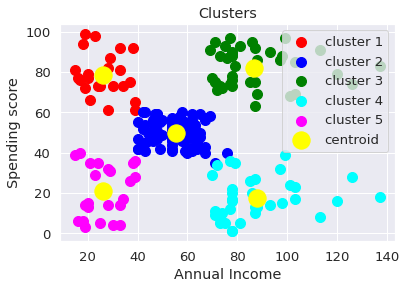

In [34]:
plt.scatter(X[ y_kmeans == 0 , 1 ] , X[y_kmeans == 0 , 2] , s = 100, c = 'red' , label = 'cluster 1')
plt.scatter(X[ y_kmeans == 1 , 1 ] , X[y_kmeans == 1 , 2] , s = 100, c = 'blue' , label = 'cluster 2')
plt.scatter(X[ y_kmeans == 2 , 1 ] , X[y_kmeans == 2 , 2] , s = 100, c = 'green' , label = 'cluster 3')
plt.scatter(X[ y_kmeans == 3 , 1 ] , X[y_kmeans == 3 , 2] , s = 100, c = 'cyan' , label = 'cluster 4')
plt.scatter(X[ y_kmeans == 4 , 1 ] , X[y_kmeans == 4 , 2] , s = 100, c = 'magenta' , label = 'cluster 5')

plt.scatter(kmeans.cluster_centers_[ : , 1], kmeans.cluster_centers_[ : , 2], s=300, c = 'yellow', label = 'centroid')
plt.title("Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.legend()
plt.show()

##Analysis of the above graph :


---

Clusters in order :
1.   *Red* - These are people with **low income** but yet **high spends** in shopping. - Should be presented with more discounted products.

2.   *Blue* - Customers with **average income** and **average spends** - Its volatile and much cant be done to this segment.
3.   *Green* - Customers with **high income**, **high spends** - Must be presented with premium products.
4.   *Cyan* - **High income, low spends** - Make them understand the brand/s more and push in offers accordingly.
5.   *pink* - **Low income, low spends** - Should be presented with discounted products.


This way Clustering can be utilized inorder to do ***Targeted Marketing*** efficiently .


Git Repo : https://github.com/rajathkotyal/Customer_Market_Clustering_Kmeans.git

About the developer : https://www.linkedin.com/in/rajathkotyal


